In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/Users/zhehaoyu/Desktop/MCM/模考/D/代码/1/order_20161101') # 导入csv格式文件中的数据

In [4]:
df.columns.values

array(['eb9dd4095d9850e6287cefd813775a6c', '1477964797', '1477966507',
       '104.094640', '30.703971', '104.089270', '30.650850'], dtype=object)

In [5]:
df.columns = ['Order ID','Begin','End','pick-up Lon',
              'pick-up Lat','drop-off Lon', 'drop-off Lat']

In [6]:
df['Begin'] = pd.to_datetime(df['Begin'],unit='s')
df['End'] = pd.to_datetime(df['End'],unit='s')

In [7]:
df['time'] = (df['End'] - df['Begin'])

In [8]:
df.sort_values('Begin', inplace=True)

In [9]:
a = df[df['Begin']> pd.Timestamp(2016, 11, 1)]

In [10]:
df = a[a['Begin']< pd.Timestamp(2016, 11, 2)]

In [19]:
x = pd.DatetimeIndex(df['Begin']).hour

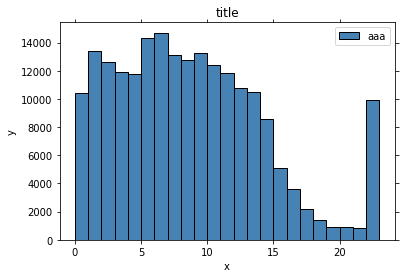

In [28]:
plt.hist(x, # 绘图数据
        color = 'steelblue', # 指定填充色
        bins = 23,
        edgecolor = 'k', # 指定直方图的边界色
        label = 'aaa' )# 为直方图呈现标签

# 去除图形顶部边界和右边界的刻度
plt.tick_params(top='off', right='off')
# 显示图例
plt.legend()
# 显示图形
plt.title('title')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### plot

In [17]:
import seaborn as sns
from scipy import stats, integrate

In [41]:
df['hour']=df['Begin'].dt.houra

In [49]:
df.loc[df['hour']==6]

,Order ID,Begin,End,pick-up Lon,pick-up Lat,drop-off Lon,drop-off Lat,time,hour
147626,f15ce03f89be668f346f0b07c7e78548,2016-11-01 06:00:00,2016-11-01 06:31:24,104.104730,30.720830,103.924730,30.791780,00:31:24,6
188342,097fa167fd59e624b1a181dcd61e469d,2016-11-01 06:00:00,2016-11-01 06:06:34,104.098310,30.648950,104.099732,30.669089,00:06:34,6
39853,176f6fe97427216ae6c3f4ca9072d9a1,2016-11-01 06:00:00,2016-11-01 06:05:44,104.060204,30.656639,104.049650,30.644620,00:05:44,6
164177,62691189d51dcdd4655d3d7a277db876,2016-11-01 06:00:01,2016-11-01 06:14:23,104.058410,30.674140,104.042420,30.628510,00:14:22,6
153591,0bbd78e0d723a1738be8d82630df8fe3,2016-11-01 06:00:01,2016-11-01 06:06:43,104.029785,30.682095,104.044191,30.681910,00:06:42,6
203135,61b149252a80975274d0b738dcb80002,2016-11-01 06:00:02,2016-11-01 06:19:43,104.083550,30.685930,104.057250,30.657130,00:19:41,6
87523,3f57b62bd58acf28671dc724a39be657,2016-11-01 06:00:02,2016-11-01 06:17:17,103.994492,30.633016,104.043621,30.692700,00:17:15,6
97861,5597d266a15cba98811f1482cc534b36,2016-11-01 06:00:02,2016-11-01 06:22:50,104.171780,30.697660,104.113960,30.650680,00:22:48,6
87005,10edb621d5d18d46e690242d4b0f2b7e,2016-11-01 06:00:02,2016-11-01 06:41:30,104.102440,30.699340,103.992420,30.752760,00:41:28,6
22116,24882d9f86b142be3c6c5913e7c0075f,2016-11-01 06:00:03,2016-11-01 06:22:41,104.073420,30.668560,104.097520,30.627460,00:22:38,6


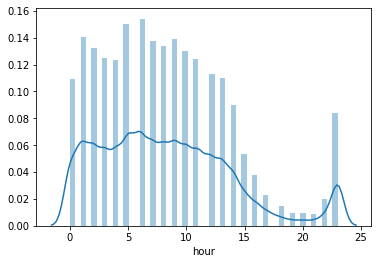

In [18]:
sns.distplot(df['hour'])

In [25]:
a = grouped['time']

In [28]:
a.to_csv("orders_time.csv",index=False,sep=',')

/Users/zhehaoyu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [29]:
a

Begin
0     10449
1     13398
2     12652
3     11885
4     11778
5     14342
6     14703
7     13110
8     12790
9     13280
10    12431
11    11817
12    10808
13    10461
14     8610
15     5108
16     3597
17     2210
18     1392
19      887
20      894
21      843
22     1880
23     8030
Name: time, dtype: int64